In [39]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('stopwords')
# !pip install feedparser
import feedparser
from datetime import datetime
from collections import defaultdict
from bs4 import BeautifulSoup
import time
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:


def calculate_cosine_similarity(text, keywords):
    stop_words = set(stopwords.words('english'))

    # Tokenize and remove stop words
    text_tokens = [word.lower() for word in word_tokenize(text) if word.isalnum() and word.lower() not in stop_words]
    keywords_tokens = [word.lower() for word in word_tokenize(' '.join(keywords)) if word.isalnum() and word.lower() not in stop_words]

    # Combine tokens into strings
    text_str = ' '.join(text_tokens)
    keywords_str = ' '.join(keywords_tokens)

    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([text_str, keywords_str])

    # Calculate cosine similarity
    similarity_matrix = cosine_similarity(vectors)

    # The similarity between text and keywords
    similarity = similarity_matrix[0][1]

    return similarity

def classify_text(text):
    text=str(text)

    terrorism_keywords = ['terrorism', 'terrorist', 'attack', 'extremism', 'radical', 'jihad', 'bombing', 'militant', 'insurgent', 'hostage', 'suicide bombing', 'security threat', 'counter-terrorism', 'radicalization', 'Islamist', 'homeland security', 'Al-Qaeda', 'ISIS', 'Taliban', 'paramilitary', 'extremist group', 'counterinsurgency', 'national security', 'counterterrorism', 'terror cell', 'violent extremism', 'war on terror', 'threat assessment', 'security alert', 'terror financing', 'IED', 'counter-radicalization', 'foreign fighter', 'cyberterrorism', 'counter-terror', 'homeland defense', 'terrorism financing', 'terror plot', 'bioterrorism', 'radiological threat', 'chemical attack', 'terror warning', 'terror watchlist', 'counter-terrorist operation', 'counter-insurgency', 'homeland intelligence', 'sleeper cell', 'counter-terrorism measures', 'cybersecurity threat', 'terrorist network', 'radical ideology', 'state-sponsored terrorism', 'security clearance', 'terror suspect', 'terror recruitment', 'counter-terrorism policy', 'terrorist act', 'terror investigation', 'counter-terrorism unit', 'homeland threat', 'terrorist financing', 'counter-terrorism strategy', 'domestic terrorism', 'cyber threat', 'terrorist attack plot', 'terrorist propaganda', 'counter-terrorism efforts', 'terrorist recruitment', 'terrorist ideology', 'terrorism expert', 'counter-terrorism initiative', 'homeland protection', 'terrorist tactics', 'radicalization prevention', 'terrorist sympathizer', 'terrorist threat assessment', 'counter-terrorism coordination', 'terrorist hideout', 'counter-terrorism measures', 'homeland defense strategy', 'cybersecurity threat', 'terrorist network investigation', 'radical ideology prevention', 'state-sponsored terrorism', 'security clearance protocol', 'terrorist sleeper cell', 'counter-terrorism policy', 'terrorist act prevention', 'terror investigation protocol', 'counter-terrorism unit procedure', 'homeland threat assessment', 'terrorist organization monitoring', 'terrorist leader identification', 'security risk assessment', 'terrorist financing tracking', 'counter-terrorism strategy planning', 'domestic terrorism prevention', 'cyber threat monitoring', 'terrorist attack plot prevention', 'terrorist propaganda monitoring', 'counter-terrorism efforts evaluation', 'terrorist recruitment prevention', 'terrorist ideology analysis']

    protest_keywords = ['protest', 'demonstration', 'rally', 'march', 'activism', 'dissent', 'demonstrator', 'civil disobedience', 'public outcry', 'social movement', 'protester', 'grassroots movement', 'political activism', 'street protest', 'mass protest', 'peaceful protest', 'sit-in', 'occupy movement', 'protest organizer', 'agitator', 'protest leader', 'protest chant', 'protest banner', 'protest placard', 'protest march', 'protest rally', 'counter-protest', 'freedom of assembly', 'protest rights', 'protest permit', 'protest policing', 'protest violence', 'protest clash', 'protest solidarity', 'human rights protest', 'protest movement', 'protest demonstration', 'protest message', 'protest slogan', 'protest gathering', 'protest call', 'protest participation', 'protest agenda', 'protest planning', 'protest strategy', 'protest coordination', 'protest organizing', 'protest advocacy', 'protest cause', 'protest platform', 'protest demands', 'protest resolution', 'protest response', 'protest impact', 'protest evaluation', 'protest outcomes', 'protest awareness', 'protest support', 'protest opposition', 'protest reaction', 'protest consequences', 'protest aftermath', 'protest resolution', 'protest mediation', 'protest negotiation', 'protest compromise', 'protest change', 'protest reform', 'protest dialogue', 'protest transformation', 'protest adaptation', 'protest progress', 'protest development', 'protest evolution', 'protest innovation', 'protest revolution', 'protest uprising', 'protest resistance', 'protest resilience', 'protest endurance', 'protest persistence', 'protest determination', 'protest courage', 'protest unity', 'protest solidarity', 'protest collaboration', 'protest empowerment', 'protest inspiration', 'protest mobilization', 'protest communication', 'protest expression', 'protest impact', 'protest legacy', 'protest historical significance']

    political_unrest_keywords = ['political unrest', 'political turmoil', 'civil unrest', 'unstable government', 'political crisis', 'government instability', 'political upheaval', 'political tension', 'political instability', 'political dissatisfaction', 'government protest', 'political conflict', 'political discord', 'state of emergency', 'government overthrow', 'political turmoil', 'political violence', 'government crackdown', 'political oppression', 'political resistance', 'government resistance', 'political repression', 'government corruption', 'political rebellion', 'government defiance', 'political dispute', 'government upheaval', 'political disarray', 'government collapse', 'political breakdown', 'government breakdown', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political breakdown', 'government breakdown', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political meltdown', 'government meltdown', 'political confrontation', 'government confrontation', 'political strife', 'government strife', 'political confrontation', 'government confrontation', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political meltdown', 'government meltdown', 'political confrontation', 'government confrontation', 'political strife', 'government strife', 'political confrontation', 'government confrontation', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political meltdown', 'government meltdown', 'political confrontation', 'government confrontation', 'political strife', 'government strife', 'political confrontation', 'government confrontation', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political meltdown', 'government meltdown', 'political confrontation', 'government confrontation', 'political strife', 'government strife', 'political confrontation', 'government confrontation', 'political disorder', 'government disorder', 'political chaos', 'government chaos', 'political meltdown', 'government meltdown', 'political confrontation', 'government confrontation', 'political strife', 'government strife']

    riot_keywords = ['riot', 'violence', 'clash', 'unrest', 'chaos', 'disturbance', 'uprising', 'tumult', 'civil disturbance', 'street violence', 'public disorder', 'mob violence', 'protest violence', 'riot police', 'rioting', 'violent protest', 'street clash', 'rioters', 'crowd control', 'violent confrontation', 'police confrontation', 'civil disorder', 'violent disorder', 'mass unrest', 'street disturbance', 'agitation', 'public unrest', 'turbulence', 'disturbance', 'mass violence', 'social unrest', 'street upheaval', 'urban unrest', 'civic unrest', 'public upheaval', 'mass disturbance', 'riot control', 'rioter arrest', 'police response', 'violence escalation', 'violent escalation', 'escalation of force', 'riot prevention', 'public safety', 'emergency response', 'civil emergency', 'riot situation', 'crowd dispersal', 'mob control', 'riot gear', 'mob management', 'violence outbreak', 'violence control', 'civil disturbance response', 'public safety measures', 'riot intervention', 'civil disturbance intervention', 'police intervention', 'protest escalation', 'clash escalation', 'unrest escalation', 'chaos escalation', 'disturbance escalation', 'uprising escalation', 'tumult escalation', 'violence escalation', 'public disorder escalation', 'mob violence escalation', 'rioting escalation', 'violent protest escalation', 'street clash escalation', 'rioters escalation', 'police confrontation escalation', 'civil disorder escalation', 'violent disorder escalation', 'mass unrest escalation', 'street disturbance escalation', 'agitation escalation', 'public unrest escalation', 'turbulence escalation', 'disturbance escalation', 'mass violence escalation', 'social unrest escalation', 'street upheaval escalation', 'urban unrest escalation', 'civic unrest escalation', 'public upheaval escalation', 'mass disturbance escalation', 'riot control escalation', 'rioter arrest escalation', 'police response escalation', 'violence escalation escalation']

    # Positive/Uplifting Keywords
    positive_keywords = ['positive', 'uplifting', 'inspiring', 'hopeful', 'joyful', 'happy', 'optimistic', 'encouraging', 'motivating', 'heartwarming',
                        'cheerful', 'pleasing', 'content', 'grateful', 'joyous', 'blessed', 'sunny', 'radiant', 'vibrant', 'lively',
                        'enthusiastic', 'exciting', 'thrilling', 'exhilarating', 'upbeat', 'buoyant', 'ebullient', 'elated', 'ecstatic',
                        'exuberant', 'overjoyed', 'blissful', 'euphoric', 'gleeful', 'jubilant', 'merry', 'jovial', 'festive', 'festivity',
                        'celebration', 'delightful', 'delighted', 'pleasurable', 'enjoyable', 'satisfying', 'contented', 'fulfilled',
                        'sanguine', 'satisfied', 'complacent', 'gratified', 'contentment', 'gratitude', 'appreciation', 'affectionate',
                        'warm-hearted', 'kind-hearted', 'tender', 'compassionate', 'sympathetic', 'empathetic', 'charming', 'pleasant',
                        'agreeable', 'friendly', 'amiable', 'lovable', 'caring', 'loving', 'affection', 'adorable', 'tender-hearted',
                        'heartening', 'comforting', 'soothing', 'reassuring', 'rejuvenating', 'refreshing', 'uplifting', 'spirited',
                        'inspirited', 'dynamic', 'positive energy', 'optimism', 'bright side', 'silver lining', 'good vibes', 'high spirits',
                        'good-natured', 'lighthearted', 'carefree', 'blithe', 'buoyancy', 'radiance', 'sunshine', 'positivity', 'positive attitude',
                        'optimistic outlook', 'hopefulness', 'hopeful attitude', 'uplifting spirit', 'joyful heart', 'grateful heart']

    # Natural Disaster Keywords
    natural_disaster_keywords = ['natural disaster', 'disaster', 'catastrophe', 'calamity', 'emergency', 'crisis', 'tragedy', 'cataclysm', 'hazard', 'calamitous event',
                                'environmental catastrophe', 'earthquake', 'tremor', 'quake', 'seismic event', 'tsunami', 'tidal wave', 'floods', 'flash flood', 'flooding',
                            'river flood', 'storm surge', 'hurricane', 'typhoon', 'cyclone', 'tropical storm', 'tornado', 'twister', 'windstorm', 'wildfire', 'forest fire',
                            'bushfire', 'blaze', 'burning', 'firestorm', 'volcano eruption', 'volcanic activity', 'lava flow', 'mudslide', 'landslide', 'avalanche',
                            'snowslide', 'snow avalanche', 'natural hazard', 'geological disaster', 'meteorological disaster', 'environmental disaster', 'act of God',
                            'force of nature', 'destructive force', 'mass destruction', 'environmental damage', 'humanitarian crisis', 'emergency response', 'disaster relief',
                            'emergency management', 'disaster recovery', 'evacuation', 'shelter', 'emergency shelter', 'disaster preparedness', 'emergency assistance',
                            'humanitarian aid', 'rescue operation', 'disaster response', 'damage assessment', 'recovery efforts', 'disaster survivor', 'vulnerable population',
                             'disaster aftermath', 'emergency evacuation', 'disaster resilience', 'emergency relief', 'natural disaster impact', 'community response',
                             'natural disaster recovery', 'crisis management', 'emergency relief efforts', 'disaster recovery plan', 'disaster risk reduction',
                             'natural disaster awareness', 'emergency medical assistance', 'emergency support', 'natural disaster assistance', 'climate-related disaster',
                             'geophysical event', 'extreme weather event', 'emergency services', 'disaster declaration', 'emergency declaration', 'natural disaster management',
                             'disaster assistance', 'disaster survivor support', 'victims of disaster', 'environmental emergency', 'humanitarian response', 'relief operation',
                             'resilience building', 'natural disaster reconstruction', 'natural disaster mitigation', 'environmental crisis', 'natural disaster recovery plan']


    terrorism = calculate_cosine_similarity(text, terrorism_keywords)
    protest = calculate_cosine_similarity(text, protest_keywords)
    political_unrest = calculate_cosine_similarity(text, political_unrest_keywords)
    riot = calculate_cosine_similarity(text, riot_keywords)
    positive = calculate_cosine_similarity(text, positive_keywords)
    natural_disaster = calculate_cosine_similarity(text, natural_disaster_keywords)
    my_dict={'terrorism':terrorism,'protest':protest,'political_unrest':political_unrest,'riot':riot,'positive':positive,'natural_disaster':natural_disaster}
    max_key = max(my_dict, key=lambda k: my_dict[k])
    max_value = my_dict[max_key]
    if max_value==0:
      return 'others'
    else:
      return max_key



In [43]:
def read_rss_feeds(feed_urls):
    articles = defaultdict(list)
    all_articles = []
    for feed_url in feed_urls:
        feed = feedparser.parse(feed_url)

        for entry in feed.entries:
            article_id = entry.get('id', entry.link)

            if article_id not in articles[feed_url]:
                title = entry.title
                # content = extract_content(entry)
                content = entry.get('summary', '')
                publication_date = parse_date(entry.get('published', ''))
                categories = classify_text(title+' '+content)
                source_url = entry.link
                article = {
                    'article_feed': feed_url,
                    'title': title,
                    'content': content,
                    'published_date': publication_date,
                    'source_url': source_url,
                    'categories': categories
                }
                all_articles.append(article)

                print(feed_url)
                print(f"Title: {title}")
                print(f"Content: {content}")
                print(f"Publication Date: {publication_date}")
                print(f"Source URL: {source_url}")
                print(f"categories: {categories}")
                print("-" * 50)
    return all_articles

def parse_date(date_string):
    try:
        parsed_date = datetime.strptime(date_string, "%a, %d %b %Y %H:%M:%S %Z")
        # Convert the datetime object to your desired format
        formatted_date = parsed_date.strftime("%Y-%m-%d %H:%M:%S")
        return formatted_date
    except ValueError:
        return None

# if __name__ == "__main__":
rss_feeds = [
    'http://rss.cnn.com/rss/cnn_topstories.rss',
    'http://qz.com/feed',
    'http://feeds.foxnews.com/foxnews/politics',
    'http://feeds.reuters.com/reuters/businessNews',
    'http://feeds.feedburner.com/NewshourWorld',
    'https://feeds.bbci.co.uk/news/world/asia/india/rss.xml'
]

articles = read_rss_feeds(rss_feeds)

# Create a DataFrame
df = pd.DataFrame(articles)


http://rss.cnn.com/rss/cnn_topstories.rss
Title: Some on-air claims about Dominion Voting Systems were false, Fox News acknowledges in statement after deal is announced
Content: 
Publication Date: 2023-04-19 12:44:51
Source URL: https://www.cnn.com/business/live-news/fox-news-dominion-trial-04-18-23/index.html
categories: others
--------------------------------------------------
http://rss.cnn.com/rss/cnn_topstories.rss
Title: Dominion still has pending lawsuits against election deniers such as Rudy Giuliani and Sidney Powell
Content: 
Publication Date: None
Source URL: https://www.cnn.com/business/live-news/fox-news-dominion-trial-04-18-23/h_8d51e3ae2714edaa0dace837305d03b8
categories: others
--------------------------------------------------
http://rss.cnn.com/rss/cnn_topstories.rss
Title: Here are the 20 specific Fox broadcasts and tweets Dominion says were defamatory
Content: • Fox-Dominion trial delay 'is not unusual,' judge says
• Fox News' defamation battle isn't stopping Trump'

In [44]:
df.head()

,article_feed,title,content,published_date,source_url,categories
0,http://rss.cnn.com/rss/cnn_topstories.rss,Some on-air claims about Dominion Voting Syste...,,2023-04-19 12:44:51,https://www.cnn.com/business/live-news/fox-new...,others
1,http://rss.cnn.com/rss/cnn_topstories.rss,Dominion still has pending lawsuits against el...,,None,https://www.cnn.com/business/live-news/fox-new...,others
2,http://rss.cnn.com/rss/cnn_topstories.rss,Here are the 20 specific Fox broadcasts and tw...,"• Fox-Dominion trial delay 'is not unusual,' j...",2023-04-17 16:01:11,https://www.cnn.com/2023/04/17/media/dominion-...,others
3,http://rss.cnn.com/rss/cnn_topstories.rss,Judge in Fox News-Dominion defamation trial: '...,The judge just announced in court that a settl...,2023-04-19 08:28:17,https://www.cnn.com/2023/04/18/media/fox-domin...,others
4,http://rss.cnn.com/rss/cnn_topstories.rss,'Difficult to say with a straight face': Tappe...,A settlement has been reached in Dominion Voti...,2023-04-18 21:17:44,https://www.cnn.com/videos/politics/2023/04/18...,terrorism


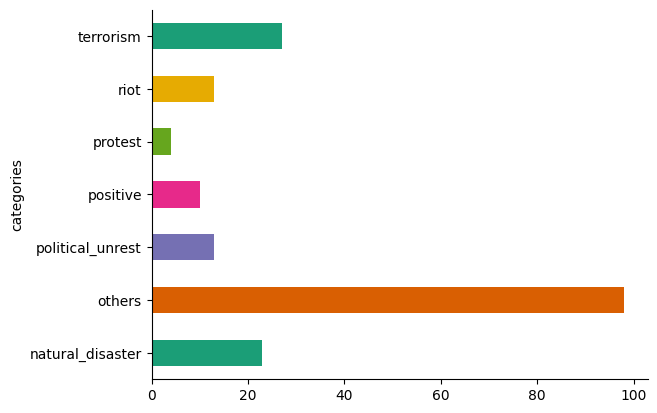

In [45]:
df.groupby('categories').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [46]:
# db_schema.py

import sqlite3
from sqlite3 import Error

def create_connection():
    connection = None
    try:
        connection = sqlite3.connect('news_articles.db')
        print("Connection to SQLite DB successful")
        return connection
    except Error as e:
        print(f"Error: {e}")
        return None

def create_articles_table(connection):
    try:
        cursor = connection.cursor()
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS articles (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                article_feed TEXT UNIQUE,
                title TEXT,
                content TEXT,
                published_date TEXT,
                source_url TEXT,
                categories TEXT
            )
        ''')
        connection.commit()
        print("Table 'articles' created successfully")
    except Error as e:
        print(f"Error: {e}")

def store_article(connection, article):
    try:
        cursor = connection.cursor()
        insert_query = '''
            INSERT INTO articles (article_feed, title, content, published_date, source_url, categories)
            VALUES (?, ?, ?, ?, ?, ?)
            ON CONFLICT (article_feed) DO NOTHING;
        '''
        cursor.execute(insert_query, (
            article['article_feed'],
            article['title'],
            article['content'],
            article['published_date'],
            article['source_url'],
            article['categories']  # Include 'category' only if available
        ))
        connection.commit()
        print("Article stored successfully")
    except Error as e:
        print(f"Error: {e}")


In [47]:
def insert_all_articles(connection, articles):
    for article in articles:
        store_article(connection, article)

connection = create_connection()
if connection:
    create_articles_table(connection)
    insert_all_articles(connection, articles)
    connection.close()

Connection to SQLite DB successful
Table 'articles' created successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Article stored successfully
Art

In [48]:
df.to_csv('/content/news_articles.csv')